In [1]:
import umap

from sklearn.model_selection import cross_val_score
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import sklearn
import pandas as pd
import pickle
from collections import Counter
from sklearn import tree 
from sklearn import svm
from sklearn.tree import export_graphviz
import graphviz

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,LeaveOneOut,LeavePOut
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [2]:
# gset = pd.read_csv('combined_batchcorrected_rawexpression.csv',index_col=0)

In [3]:
# gset[:5]

In [4]:
# gset.shape

In [5]:
# # deal with missing #s
# gset.replace([np.inf, -np.inf], np.nan)
# gset = gset.fillna(gset.mean())

In [6]:
# # dimensionality reduction techniques
# # pca
# fit_pca =PCA()
# gset_pca = fit_pca.fit_transform(gset)
# gset_pca.shapegset_pca.shape

In [7]:
# # pca+umap
# fit_pca_umap = umap.UMAP()
# gset_pca_umap = fit_pca_umap.fit_transform(gset_pca)
# gset_pca_umap.shape

In [8]:
# # umap fit method
# fit_umap = umap.UMAP()
# gset_umap = fit_umap.fit_transform(gset)

In [9]:
# get labels

labels_df = pd.read_csv('combined_labels.csv',index_col=0)
# labels_df['disease_label'] = 0
# for idx, row in labels_df.iterrows():
#     if row['disease'] == "Schizophrenia":
#         labels_df.at[idx,'disease_label'] = 1
#     elif row['disease'] == "Bipolar Disorder" or row['disease'] == "Bipolar Disease":
#         labels_df.at[idx,'disease_label'] = 2
#     elif row['disease'] == "Major Depressive Disorder":
#         labels_df.at[idx,'disease_label'] = 3
print(labels_df.shape)
labels_df[:5]

(588, 7)


,disease state:ch1,disease,study,gsm,title,characteristics_ch1,diagnosis:ch1
1,"acutely admitted, severely psychotic schizophr...",Schizophrenia,GSE27383,GSM677118,NaN,NaN,NaN
2,"acutely admitted, severely psychotic schizophr...",Schizophrenia,GSE27383,GSM677119,NaN,NaN,NaN
3,"acutely admitted, severely psychotic schizophr...",Schizophrenia,GSE27383,GSM677120,NaN,NaN,NaN
4,"acutely admitted, severely psychotic schizophr...",Schizophrenia,GSE27383,GSM677121,NaN,NaN,NaN
5,"acutely admitted, severely psychotic schizophr...",Schizophrenia,GSE27383,GSM677122,NaN,NaN,NaN


In [10]:
# gset_info_df = gset.merge(labels_df, left_index=True, right_on='gsm')[['disease','study','gsm']]
# gset_info_df['disease_label']= gset_info_df.disease.map({'Control': 0, 'Major Depressive Disorder': 1, 'Schizophrenia': 0, 'Bipolar Disorder': 0})
# gset_info_df['study_label']= gset_info_df.study.map({'GSE92538': 0, 'GSE98793': 1, 'GSE27383': 2, 'GSE21138': 3, 'GSE120340': 4})

# gset_info_df[:5]

In [11]:
# # get disease labels
# # disease_labels_str_dict = pd.Series(labels_df.disease.values,index=labels_df.gsm).to_dict()
# # disease_labels_dict = pd.Series(labels_df.disease_label.values,index=labels_df.gsm).to_dict()
# # disease_labels_str = gset.index.map(disease_labels_str_dict)
# disease_labels_str = gset_info_df['disease']
# disease_labels = gset_info_df['disease_label']
# disease_labels = disease_labels.fillna(0).astype(int)
# diseases = ['Control','Major Depressive Disorder','Schizophrenia', 'Bipolar Disorder']
# print(len(disease_labels))
# print(diseases)
# print(Counter(disease_labels))
# print(Counter(disease_labels_str))

In [12]:
# # gse labels
# gses=['GSE92538', 'GSE98793', 'GSE27383', 'GSE21138', 'GSE120340']
# gse_labels_str = gset_info_df['study']
# gse_labels = gset_info_df['study_label']
# print(len(gse_labels))
# print(Counter(gse_labels))
# print(Counter(gse_labels_str))

# PROPS Approach

In [13]:
props_df = pd.read_csv('combat_combined_propsfeatures.csv',index_col=0)
props_df[:5]

,pathway_ID,GSM3398487,GSM3398488,GSM3398489,GSM3398490,GSM3398491,GSM3398492,GSM3398493,GSM3398494,GSM3398495,...,GSM2432044,GSM2432049,GSM2432057,GSM2432059,GSM2432072,GSM2432075,GSM2432085,GSM2432086,GSM2432088,GSM2432090
1,00010.xml,-9.895942,-9.402458,-10.333418,-9.313229,-12.674237,-11.002089,-9.123498,-10.339568,-12.226166,...,-21.404894,-9.106667,-9.282351,-3.607363,-10.230108,-4.535804,-16.108427,-8.351769,-10.044861,-238.114105
2,00020.xml,-15.785762,-10.173292,-10.543588,-11.715210,-13.417590,-11.585305,-11.121884,-13.583983,-12.045595,...,-8.991958,-7.920727,-8.073851,-7.731123,-8.370115,-8.763573,-6.158938,-8.412651,-7.953638,-97.029385
3,00030.xml,-7.616256,-4.584654,-6.293867,-5.626597,-7.102741,-7.024158,-5.503789,-8.012068,-9.232267,...,-6.184027,-3.964337,-5.421821,-9.379734,-12.090192,-2.452039,-7.664569,-3.377124,-3.746223,-62.341466
4,00040.xml,-9.133081,-4.832528,-6.944735,-7.904467,-6.032927,-4.728201,-7.007052,-7.665162,-8.875407,...,-4.980902,-1.931260,-5.942128,-7.814744,-2.788436,-4.105343,-6.713435,-2.825407,-5.983287,-76.580487
5,00051.xml,-6.785535,-4.488263,-5.528785,-3.390019,-7.221015,-6.002834,-5.084589,-6.046549,-7.621705,...,-6.150147,-3.287794,-1.494484,-0.323481,-10.036542,-1.946388,-7.634848,1.793308,-6.325226,-61.595918


In [14]:
props_df.shape

(261, 338)

In [15]:
props_df.index=props_df.pathway_ID
props = props_df.T
props=props.iloc[1:,:]# remove pathway_ID row

In [16]:
props[:5]

pathway_ID,00010.xml,00020.xml,00030.xml,00040.xml,00051.xml,00052.xml,00061.xml,00062.xml,00071.xml,00072.xml,...,05320.xml,05321.xml,05322.xml,05323.xml,05330.xml,05332.xml,05410.xml,05412.xml,05414.xml,05416.xml
GSM3398487,-9.89594,-15.7858,-7.61626,-9.13308,-6.78554,-3.9046,-10.8623,-8.37965,-17.6961,-2.26185,...,-4.19158,-31.7155,-10.1775,-9.56433,-4.19158,-13.4545,-12.687,-17.2614,-40.5972,-20.6292
GSM3398488,-9.40246,-10.1733,-4.58465,-4.83253,-4.48826,-3.12131,-5.34664,-4.61874,-7.19308,-3.81999,...,-3.80106,-22.1907,-5.19814,-9.70874,-3.80106,-10.0763,-7.9244,-7.58286,-24.9845,-12.999
GSM3398489,-10.3334,-10.5436,-6.29387,-6.94473,-5.52879,-3.28054,-6.66612,-4.82347,-10.7511,-3.61166,...,-4.79731,-23.1687,-5.53471,-10.3617,-4.79731,-11.6457,-6.36373,-8.26657,-24.4569,-13.4416
GSM3398490,-9.31323,-11.7152,-5.6266,-7.90447,-3.39002,-2.4044,-7.42492,-2.59701,-9.62597,-2.68202,...,-3.99012,-22.238,-5.95358,-9.2952,-3.99012,-13.7074,-7.28014,-8.64671,-26.5986,-13.5814
GSM3398491,-12.6742,-13.4176,-7.10274,-6.03293,-7.22102,-3.62479,-7.51341,-4.21453,-12.1408,-2.35407,...,-5.29811,-22.7053,-4.97877,-8.97901,-5.29811,-11.3798,-9.05839,-11.7407,-29.1432,-17.5016


In [18]:
props_info_df = props.merge(labels_df, left_index=True, right_on='gsm')[['disease','study','gsm']]
props_info_df['disease_label']= props_info_df.disease.map({'Control': 0, 'Major Depressive Disorder': 0, 'Schizophrenia': 0, 'Bipolar Disorder': 1})
props_info_df['study_label']= props_info_df.study.map({'GSE92538': 0, 'GSE98793': 1, 'GSE27383': 2, 'GSE21138': 3, 'GSE120340': 4})

props_info_df[:5]

,disease,study,gsm,disease_label,study_label
142,Schizophrenia,GSE120340,GSM3398487,0,4
143,Schizophrenia,GSE120340,GSM3398488,0,4
144,Schizophrenia,GSE120340,GSM3398489,0,4
145,Schizophrenia,GSE120340,GSM3398490,0,4
146,Schizophrenia,GSE120340,GSM3398491,0,4


In [19]:
disease_labels_str = props_info_df['disease']
disease_labels = props_info_df['disease_label']
disease_labels = disease_labels.fillna(0).astype(int)
diseases = ['Control','Major Depressive Disorder','Schizophrenia', 'Bipolar Disorder']
print(len(disease_labels))
print(diseases)
print(Counter(disease_labels))
print(Counter(disease_labels_str))

337
['Control', 'Major Depressive Disorder', 'Schizophrenia', 'Bipolar Disorder']
Counter({0: 285, 1: 52})
Counter({'Major Depressive Disorder': 175, 'Schizophrenia': 110, 'Bipolar Disorder': 52})


In [20]:
# gse labels
gses=['GSE92538', 'GSE98793', 'GSE27383', 'GSE21138', 'GSE120340']
gse_labels_str = props_info_df['study']
gse_labels = props_info_df['study_label']
print(len(gse_labels))
print(Counter(gse_labels))
print(Counter(gse_labels_str))

337
Counter({1: 128, 0: 116, 2: 43, 3: 30, 4: 20})
Counter({'GSE98793': 128, 'GSE92538': 116, 'GSE27383': 43, 'GSE21138': 30, 'GSE120340': 20})


In [21]:
# dimensionality reduction techniques
# pca
fit_pca =PCA()
gset_pca = fit_pca.fit_transform(props)
gset_pca.shape

(337, 261)

In [22]:
# pca+umap
fit_pca_umap = umap.UMAP()
gset_pca_umap = fit_pca_umap.fit_transform(gset_pca)
gset_pca_umap.shape

(337, 2)

In [23]:
# umap fit method
fit_umap = umap.UMAP()
gset_umap = fit_umap.fit_transform(props)
gset_umap.shape

(337, 2)

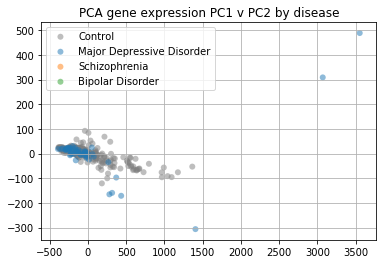

In [24]:
# plotting

fig, ax = plt.subplots()
for idx, color in enumerate(['tab:grey','tab:blue', 'tab:orange', 'tab:green']):
    ax.scatter(gset_pca[disease_labels==idx,0], gset_pca[disease_labels==idx,1], c=color, label=diseases[idx],
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.title('PCA gene expression PC1 v PC2 by disease')

plt.show()

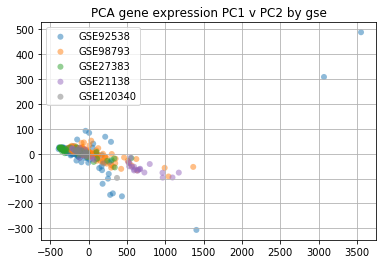

In [25]:
# fig = plt.scatter(u[:,0], u[:,1], c=gse_labels)
# plt.legend(fig)
fig, ax = plt.subplots()
for idx, color in enumerate(['tab:blue', 'tab:orange', 'tab:green','tab:purple','tab:grey']):
    ax.scatter(gset_pca[gse_labels==idx,0], gset_pca[gse_labels==idx,1], c=color, label=gses[idx],
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.title('PCA gene expression PC1 v PC2 by gse')

plt.show()

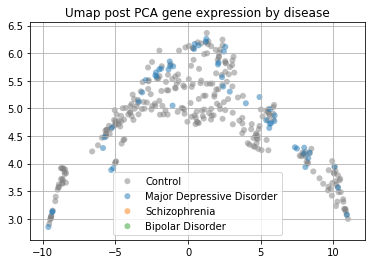

In [26]:
# plotting

fig, ax = plt.subplots()
for idx, color in enumerate(['tab:grey','tab:blue', 'tab:orange', 'tab:green']):
    ax.scatter(gset_pca_umap[disease_labels==idx,0], gset_pca_umap[disease_labels==idx,1], c=color, label=diseases[idx],
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.title('Umap post PCA gene expression by disease')

plt.show()

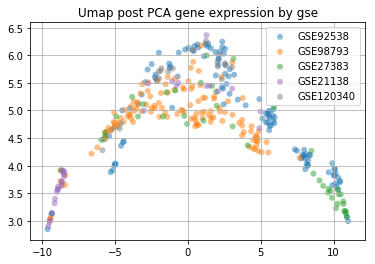

In [27]:
# fig = plt.scatter(u[:,0], u[:,1], c=gse_labels)
# plt.legend(fig)
fig, ax = plt.subplots()
for idx, color in enumerate(['tab:blue', 'tab:orange', 'tab:green','tab:purple','tab:grey']):
    ax.scatter(gset_pca_umap[gse_labels==idx,0], gset_pca_umap[gse_labels==idx,1], c=color, label=gses[idx],
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.title('Umap post PCA gene expression by gse')

plt.show()

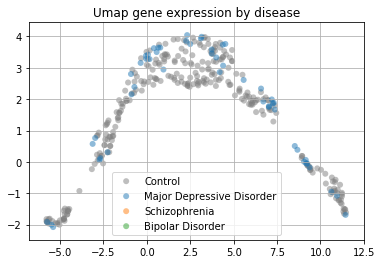

In [28]:
# plotting

fig, ax = plt.subplots()
for idx, color in enumerate(['tab:grey','tab:blue', 'tab:orange', 'tab:green']):
    ax.scatter(gset_umap[disease_labels==idx,0], gset_umap[disease_labels==idx,1], c=color, label=diseases[idx],
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.title('Umap gene expression by disease')

plt.show()

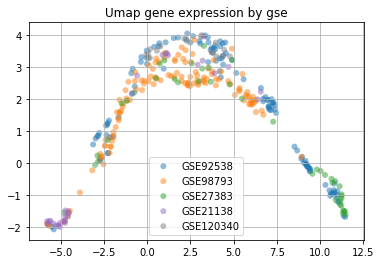

In [29]:
# fig = plt.scatter(u[:,0], u[:,1], c=gse_labels)
# plt.legend(fig)
fig, ax = plt.subplots()
for idx, color in enumerate(['tab:blue', 'tab:orange', 'tab:green','tab:purple','tab:grey']):
    ax.scatter(gset_umap[gse_labels==idx,0], gset_umap[gse_labels==idx,1], c=color, label=gses[idx],
               alpha=0.5, edgecolors='none')

ax.legend()
ax.grid(True)
plt.title('Umap gene expression by gse')

plt.show()

In [30]:
# # fig = plt.scatter(u[:,0], u[:,1], c=gse_labels)
# # plt.legend(fig)
# fig, ax = plt.subplots()
# disease=['SCZ','MDD','BPD']
# for idx, color in enumerate(['tab:blue', 'tab:orange', 'tab:green']):
#     ax.scatter(u[disease_labels==(idx+1),2], u[disease_labels==(idx+1),3], c=color, label=disease[idx],
#                alpha=0.5, edgecolors='none')

# ax.legend()
# ax.grid(True)

# plt.show()

In [31]:
# print('mdd')
# for dim in range(u.shape[1]):
#     MDD_arr = u[disease_labels==1,dim]
#     range_MDD = max(MDD_arr) - min(MDD_arr)
#     print(np.std(MDD_arr),range_MDD, dim)
# print('bpd')
# for dim in range(u.shape[1]):
#     BPD_arr = u[disease_labels==2,dim]
#     range_BPD = max(BPD_arr) - min(BPD_arr)
#     print(np.std(BPD_arr),range_BPD,dim)

In [32]:
# # fig = plt.scatter(u[:,0], u[:,1], c=gse_labels)
# # plt.legend(fig)
# fig, ax = plt.subplots()
# gses=['gse98793','gse92538','gse27383']
# for idx, color in enumerate(['tab:blue', 'tab:orange', 'tab:green']):
#     ax.scatter(u[gse_labels==(idx+1),0], u[gse_labels==(idx+1),1], c=color, label=gses[idx],
#                alpha=0.5, edgecolors='none')

# ax.legend()
# ax.grid(True)

# plt.show()

In [33]:
# print(propsfeatures.shape)
# print(disease_labels.shape)

In [34]:

X_train, X_test, y_train, y_test = train_test_split(props, disease_labels, test_size = 0.3, random_state = 10)
X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.mean())
X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())
y_train.replace([np.inf, -np.inf], np.nan)
y_train = y_train.fillna(y_train.mean())
y_test.replace([np.inf, -np.inf], np.nan)
y_test = y_test.fillna(y_test.mean())




In [35]:
_, _, y_train_gse, y_test_gse = train_test_split(props, gse_labels, test_size = 0.3, random_state = 10)


In [36]:
Counter(y_test)

Counter({0: 91, 1: 11})

# Disease prediction

In [37]:
random_states = np.random.randint(1000,size=100)


In [38]:
# grid search for best hyperparameter
best_params = []
best_acc = 0
best_clf = None
clf_arr = []
best_clf_arr = []
params_arr = []
for max_depth in [4]: #tried range 2-5, 4 was consistently the best
    for n_estimators in [10,50,100]:#,400]:# tried 10--> 400
        for min_samples_leaf in [4]: # tried 2,3,4,5 4 consistently the best
            print('max_depth', max_depth)
            print('n_estimators', n_estimators)
            print('min_samples_leaf',min_samples_leaf)
            # average 100 random states:
            acc_arr = []
            clf_arr = []
            for random_state in random_states:
                clf_gini = RandomForestClassifier(criterion = "gini", random_state = random_state,
                                                  n_estimators=n_estimators,
                                           max_depth=max_depth, min_samples_leaf=min_samples_leaf)
                clf_gini.fit(X_train, y_train)
                y_pred = clf_gini.predict(X_test)
                acc =  accuracy_score(y_test,y_pred)*100
                acc_arr.append(acc)
                clf_arr.append(clf_gini)
            avg_acc = np.mean(acc_arr)
            print("Accuracy is ", avg_acc)
            if avg_acc > best_acc:
                best_params = [max_depth, n_estimators, min_samples_leaf ]
                best_acc = avg_acc
                best_clf = clf_gini
            best_clf_arr.append(clf_arr)
            params_arr.append([max_depth, n_estimators, min_samples_leaf ])
print('best accuracy is', best_acc)
print(best_params)


max_depth 4
n_estimators 10
min_samples_leaf 4
Accuracy is  89.11764705882356
max_depth 4
n_estimators 50
min_samples_leaf 4
Accuracy is  89.21568627450985
max_depth 4
n_estimators 100
min_samples_leaf 4
Accuracy is  89.21568627450985
best accuracy is 89.21568627450985
[4, 50, 4]


In [39]:
# print(y_test)
# print(y_pred)
# print(y_test_gse)


# n_estimators =10

In [40]:
# determine 50 most commonly used features
from collections import Counter
feature_counter = Counter()

clf_arr_10=best_clf_arr[0]
tot_num_features = 0
for clf in clf_arr_10:# len 100
    for estimator in clf: # len 10
        tot_num_features+=len(estimator.tree_.feature)
        for feature in estimator.tree_.feature:
            feature_counter[feature]+=1
            
feature_counter_exp = {}
for key, value in feature_counter.items():
    if key != -2:
        feature_counter_exp[props.columns.values[key]] = value/tot_num_features*len(random_states)
print(len(feature_counter_exp))
most_freq_pathways_50 = [x[0] for x in sorted(feature_counter_exp.items(),key=lambda pair: pair[1], reverse=True)][:50]


261


In [41]:
estimator.tree_.threshold

array([-28.79297161, -62.93041801,  -2.        ,  -2.        ,
       -54.2902832 , -30.81985283, -34.86072445,  -2.        ,
        -2.        ,  -2.        ,   0.19399953,  -5.41173983,
        -2.        ,  -2.        , -13.85827398,  -2.        ,
        -2.        ])

In [41]:
# rerun accuracy on the 50 most common featres 
X_train_select = X_train[most_freq_pathways_50]
X_test_select = X_test[most_freq_pathways_50]
acc_arr = []
clf_arr = []
for random_state in random_states:
    clf_gini = RandomForestClassifier(criterion = "gini", random_state = random_state,
                                      n_estimators=10,
                               max_depth=4, min_samples_leaf=4)
    clf_gini.fit(X_train_select, y_train)
    y_pred = clf_gini.predict(X_test_select)
    acc =  accuracy_score(y_test,y_pred)*100
    acc_arr.append(acc)
    clf_arr.append(clf_gini)
avg_acc = np.mean(acc_arr)
print("Accuracy is ", avg_acc)

Accuracy is  81.94117647058823


In [42]:
results=pd.DataFrame({'y_test':y_test,'y_pred':y_pred,'y_test_gse':y_test_gse, 'acc_bool':y_test==y_pred})
results[results['acc_bool']==False]

,y_test,y_pred,y_test_gse,acc_bool
252,0,1,1,False
461,1,0,0,False
143,1,0,4,False
521,0,1,0,False
328,0,1,1,False
23,1,0,2,False
381,1,0,0,False
106,1,0,3,False
420,0,1,0,False
72,1,0,2,False


In [43]:
Counter(y_pred)

Counter({0: 78, 1: 24})

In [44]:
Counter(y_test)

Counter({0: 73, 1: 29})

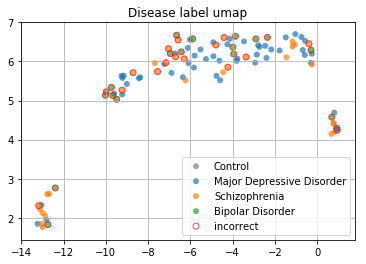

In [84]:
# umap of test set
fit = umap.UMAP()
u = fit.fit_transform(X_test)
fig, ax = plt.subplots()
for idx, color in enumerate(['tab:grey','tab:blue', 'tab:orange', 'tab:green']):
    ax.scatter(u[y_test==(idx),0], u[y_test==(idx),1], c=color, label=diseases[idx],
               alpha=0.7, edgecolors='none')

ax.scatter(u[y_test!=y_pred,0], u[y_test!=y_pred,1],  label='incorrect',
               alpha=0.7, edgecolors='red',facecolors='none', )
ax.legend()
ax.grid(True)
plt.title('Disease label umap')

plt.show()

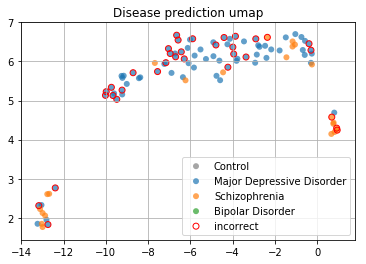

In [86]:
# umap of test set

fig, ax = plt.subplots()
# disease=['SCZ','MDD','BPD']
for idx, color in enumerate(['tab:grey','tab:blue', 'tab:orange', 'tab:green']):
    ax.scatter(u[y_pred==(idx),0], u[y_pred==(idx),1], c=color, label=diseases[idx],
               alpha=0.7, edgecolors='none')

ax.scatter(u[y_test!=y_pred,0], u[y_test!=y_pred,1],  label='incorrect',
               alpha=1, edgecolors='red',facecolors='none')
ax.legend()
ax.grid(True)
plt.title('Disease prediction umap')

plt.show()

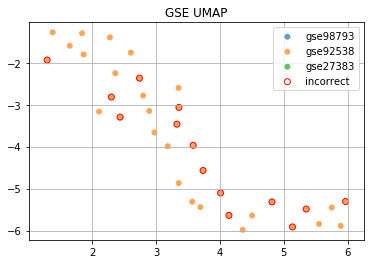

In [127]:
fig, ax = plt.subplots()
gses=['gse98793','gse92538','gse27383']
for idx, color in enumerate(['tab:blue', 'tab:orange', 'tab:green']):
    ax.scatter(u[y_test_gse==(idx+1),0], u[y_test_gse==(idx+1),1], c=color, label=gses[idx],
               alpha=0.7, edgecolors='none')

ax.scatter(u[y_test!=y_pred,0], u[y_test!=y_pred,1],  label='incorrect',
               alpha=1, edgecolors='red',facecolors='none')
ax.legend()
ax.grid(True)
plt.title('GSE UMAP')
plt.show()

# n_estimators = 50

In [42]:
clf = RandomForestClassifier(criterion = "gini", random_state = random_state,
                                      n_estimators=50,
                               max_depth=4, min_samples_leaf=4)
scores = cross_val_score(clf, props, disease_labels, cv=LeaveOneOut())
#scores                                              
#The mean score and the 95% confidence interval of the score estimate are hence given by:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.85 (+/- 0.72)


In [43]:
feature_counter_50 = Counter()
clf_arr_50=best_clf_arr[1]
tot_num_features_50 = 0
for clf in clf_arr_50:# len 100
    for estimator in clf: # len 50
        tot_num_features_50+=len(estimator.tree_.feature)
        for feature in estimator.tree_.feature:
            feature_counter_50[feature]+=1
            
feature_counter_exp_50 = {}
for key, value in feature_counter_50.items():
    if key != -2:
        feature_counter_exp_50[props.columns.values[key]] = value/tot_num_features_50*len(random_states)
print(len(feature_counter_exp_50))
most_freq_pathways_50_50 = [x[0] for x in sorted(feature_counter_exp_50.items(),key=lambda pair: pair[1], reverse=True)][:50]


261


In [44]:
# rerun accuracy on the 50 most common featres 
X_train_select = X_train[most_freq_pathways_50_50]
X_test_select = X_test[most_freq_pathways_50_50]
acc_arr = []
clf_arr = []
for random_state in random_states:
    clf_gini = RandomForestClassifier(criterion = "gini", random_state = random_state,
                                      n_estimators=10,
                               max_depth=4, min_samples_leaf=4)
    clf_gini.fit(X_train_select, y_train)
    y_pred = clf_gini.predict(X_test_select)
    acc =  accuracy_score(y_test,y_pred)*100
    acc_arr.append(acc)
    clf_arr.append(clf_gini)
avg_acc = np.mean(acc_arr)
print("Accuracy is ", avg_acc)

Accuracy is  89.00000000000001


# n_estimators = 100

In [45]:
feature_counter_100 = Counter()
clf_arr_100=best_clf_arr[2]
tot_num_features_100 = 0
for clf in clf_arr_100:# len 100
    for estimator in clf: # len 100
        tot_num_features_100+=len(estimator.tree_.feature)
        for feature in estimator.tree_.feature:
            feature_counter_100[feature]+=1
            
feature_counter_exp_100 = {}
for key, value in feature_counter_100.items():
    if key != -2:
        feature_counter_exp_100[props.columns.values[key]] = value/tot_num_features_100*len(random_states)
print(len(feature_counter_exp_100))
most_freq_pathways_50_100 = [x[0] for x in sorted(feature_counter_exp_100.items(),key=lambda pair: pair[1], reverse=True)][:50]


261


In [46]:
# rerun accuracy on the 50 most common featres 
X_train_select = X_train[most_freq_pathways_50_100]
X_test_select = X_test[most_freq_pathways_50_100]
acc_arr = []
clf_arr = []
for random_state in random_states:
    clf_gini = RandomForestClassifier(criterion = "gini", random_state = random_state,
                                      n_estimators=10,
                               max_depth=4, min_samples_leaf=4)
    clf_gini.fit(X_train_select, y_train)
    y_pred = clf_gini.predict(X_test_select)
    acc =  accuracy_score(y_test,y_pred)*100
    acc_arr.append(acc)
    clf_arr.append(clf_gini)
avg_acc = np.mean(acc_arr)
print("Accuracy is ", avg_acc)

Accuracy is  73.9313725490196


# Feature importance

In [45]:
# import kegg pathways and genes
df_arr = []
with open('kegg_pathways.txt', 'r') as f:
    for line in f.readlines():
        line_arr = line.strip().split('\t')
        pathway_id = line_arr[0].split(': ')[0]
        pathway_name = line_arr[0].split(': ')[1]
        source = line_arr[1]
        gene_list = line_arr[2].split(',')[:-1]
        df_arr.append([pathway_id,pathway_name,source,gene_list])
kegg_df = pd.DataFrame(df_arr)
kegg_df.columns = ['pathway_id','pathway_name','source','gene_list']
###NOTE ONLY USE THE PATHWAY NAMES

In [46]:
kegg_ids = ['hsa'+x.split('.')[0] for x in props.columns.values]


In [47]:
# look at the CLFS FOR n_estimators =10 and find avg feature importance
feature_importance_arr =[[]]*props.shape[1]
for clf in clf_arr_50:# len 100
    for idx,score in enumerate(clf.feature_importances_):
        if score >0:
            feature_importance_arr[idx] = feature_importance_arr[idx]+[score]

feature_importance_arr = [sum(arr) for arr in feature_importance_arr]


In [48]:
feature_importance_dict = dict(zip(kegg_ids,feature_importance_arr))
features_ordered_by_importance = [x for x in sorted(feature_importance_dict.items(),key=lambda pair: pair[1], reverse=True)]


In [49]:
feature_importance_df = pd.DataFrame({'pathway_id':list(feature_importance_dict.keys()),
                                    'importance':list(feature_importance_dict.values())
                                     })


In [50]:
feature_importance_df = feature_importance_df.merge(kegg_df,on='pathway_id')
feature_importance_df.sort_values('importance',ascending=False,inplace=True)


In [51]:
# feature_importance_df[:50]

In [52]:
# import gene 
kegg_gene_dict = pickle.load(open('kegg_gene_dictionary.pickle','rb'))
kegg_gene_dict['00010']

set()

In [53]:
kegg_gene_dict_renamed = {}
for key, value in kegg_gene_dict.items():
    kegg_gene_dict_renamed['hsa'+key] = value
kegg_gene_dict_renamed_df = pd.DataFrame({'pathway_id':list(kegg_gene_dict_renamed.keys()),
                                         'gene_list_new':list(kegg_gene_dict_renamed.values())})
kegg_gene_dict_renamed_df = feature_importance_df.merge(kegg_gene_dict_renamed_df,on='pathway_id')
kegg_gene_dict_renamed_df['gene_list_intersection'] = ''
kegg_gene_dict_renamed_df['gene_list_union'] =''

for idx, row in kegg_gene_dict_renamed_df.iterrows():
    kegg_gene_dict_renamed_df.at[idx,'gene_list_intersection'] = set(row['gene_list']).intersection(row['gene_list_new'])
    kegg_gene_dict_renamed_df.at[idx,'gene_list_union'] = set(row['gene_list']).union(row['gene_list_new'])
    
# we did the intersection to see if the new and old gene_lists were overlapping, found none. 
#upon closer inspection used gene_list_new


kegg_gene_dict_renamed_df.drop(['gene_list','gene_list_intersection','gene_list_union'],axis=1,inplace=True) 
kegg_gene_dict_renamed_df[:5]

,pathway_id,importance,pathway_name,source,gene_list_new
0,hsa05032,1.973668,Morphine addiction,KEGG_pathway,"{2868, 2869, 2870}"
1,hsa04723,1.639501,Retrograde endocannabinoid signaling,KEGG_pathway,"{2563, 221955, 2564, 2565, 2566, 2567, 2568, 2..."
2,hsa00830,1.537358,Retinol metabolism,KEGG_pathway,"{1548, 50700, 1555, 10901, 8854, 56603, 8608, ..."
3,hsa05010,1.491046,Alzheimer's disease,KEGG_pathway,"{25825, 322, 23621, 10313, 8883, 57142, 3416, ..."
4,hsa04740,1.465716,Olfactory transduction,KEGG_pathway,"{401427, 83988, 391189, 391190, 391191, 391192..."


In [54]:
kegg_gene_dict_renamed_df.to_csv('RF_kegg_pathway_props_feature_importance_BPD.csv')

In [55]:
# get the genes that are important from 
top_x_arr = [10,20,30,50]
for top_x in top_x_arr:
    gene_set_arr = kegg_gene_dict_renamed_df.loc[:top_x,'gene_list_new']
    gene_set_top = set()
    for gene_set in gene_set_arr:
        gene_set_top = gene_set_top.union(gene_set)
    #save to txt, one gene per row
    with open('genes_from_top_'+str(top_x)+'_BPD.txt','w') as f:
        for gene in gene_set_top:
            f.write(str(gene)+'\n')
        print('wrote', 'genes_from_top_'+str(top_x)+'_BPD.txt')


wrote genes_from_top_10_BPD.txt
wrote genes_from_top_20_BPD.txt
wrote genes_from_top_30_BPD.txt
wrote genes_from_top_50_BPD.txt


In [203]:
# # check if ids in kegg_df
# in_kegg_df = [feat in list(kegg_df['pathway_id']) for feat in features_ordered_by_importance]
# Counter(in_kegg_df[:50])

Counter({True: 47, False: 3})

In [206]:

# in_gene_dict = [feat[3:] in list(kegg_gene_dict.keys()) for feat in features_ordered_by_importance]
# Counter(in_gene_dict[:50])

Counter({True: 42, False: 8})

In [195]:
# # import gene 
# kegg_gene_dict = pickle.load(open('kegg_gene_dictionary.pickle','rb'))
# kegg_gene_dict['00010']

set()

In [ ]:
best_clf.estimators_

feature_importances_ : array of shape = [n_features]
Return the feature importances.

max_features_ : int,
The inferred value of max_features.

n_classes_ : int or list
The number of classes (for single output problems), or a list containing the number of classes for each output (for multi-output problems).

n_features_ : int
The number of features when fit is performed.

n_outputs_ : int
The number of outputs when fit is performed.

tree_ : Tree object
    
estimator.tree_

In [ ]:
# grid search for best hyperparameter
best_params = []
best_acc = 0
for max_depth in [3,4,5]:
    for min_samples_leaf in [3,4,5]:
        print('max_depth', max_depth)
        print('min_samples_leaf',min_samples_leaf)
        # average 100 random states:
        acc_arr = []
        for random_state in random_states:
            clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                                   max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf_gini.fit(X_train, y_train)
            y_pred = clf_gini.predict(X_test)
            acc =  accuracy_score(y_test,y_pred)*100
            acc_arr.append(acc)
        avg_acc = np.mean(acc_arr)
        print("Accuracy is ", avg_acc)
        if avg_acc > best_acc:
            best_params = [max_depth, min_samples_leaf ]
            best_acc = avg_acc

print('best accuracy is', best_acc)
print(best_params)


In [ ]:
# grid search for best hyperparameter
best_params = []
best_acc = 0
for max_depth in [2,3,4,5]:
    for min_samples_leaf in [2,3,4,5]:
        print('max_depth', max_depth)
        print('min_samples_leaf',min_samples_leaf)
        # average 100 random states:
        acc_arr = []
        for random_state in random_states:
            clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
                                   max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf_entropy.fit(X_train, y_train)
            y_pred = clf_entropy.predict(X_test)
            acc =  accuracy_score(y_test,y_pred)*100
            acc_arr.append(acc)
        avg_acc = np.mean(acc_arr)
        print("Accuracy is ", avg_acc)
        if avg_acc > best_acc:
            best_params = [max_depth, min_samples_leaf ]
            best_acc = avg_acc

print('best accuracy is', best_acc)
print(best_params)


In [ ]:
# dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=propsfeatures.columns, class_names=['SCZ', 'BPD', 'MDD'], 
#                                 filled=True, rounded=True, special_characters=True)  
# graph = graphviz.Source(dot_data)  
# graph

In [ ]:
# check for each tree how many features were used and 
# find the proportion per pathway of the number of tre that pathway was in


In [ ]:
for name, importance in zip(propsfeatures.columns, clf_gini.feature_importances_):
    if importance != 0:
        print(name, importance)

In [ ]:
# check for each tree how many features were used and 
# find the proportion per pathway of the number of tre that pathway was in


In [ ]:
# run RF where we only use a certain number of features each time


In [ ]:
# find the genes in the pathway (manual)

# SVM

In [ ]:
disease_labels = props['disease']
propsfeatures = props.iloc[:,1:(len(props.columns) - 1)]
X_train, X_test, y_train, y_test = train_test_split(propsfeatures, disease_labels, test_size = 0.3, random_state = 100)
X_test.replace([np.inf, -np.inf], np.nan)
X_test = X_test.fillna(X_test.mean())
X_train.replace([np.inf, -np.inf], np.nan)
X_train = X_train.fillna(X_train.mean())
y_train.replace([np.inf, -np.inf], np.nan)
y_train = y_train.fillna(y_train.mean())
y_test.replace([np.inf, -np.inf], np.nan)
y_test = y_test.fillna(y_test.mean())


In [ ]:
clf_svm = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf_svm.fit(X_train, y_train) 
y_pred = clf_svm.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

In [ ]:
clf_svm.support_vectors_.shape

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train, y_train)
y_pred = lin_clf.predict(X_test)
print("Accuracy is ", accuracy_score(y_test,y_pred)*100)

In [ ]:
lin_clf.coef_

In [ ]:
lin_clf.decision_function

In [ ]:
dec = lin_clf.decision_function([[1]])

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# we create 40 separable points
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (('unreg', 1), ('reg', 0.05)):

    clf = svm.SVC(kernel='linear', C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    print(clf.support_vectors_.shape, 'support vectors')
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired,
                edgecolors='k')

    plt.axis('tight')
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z, cmap=plt.cm.Paired)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

Review of today
- we tuned the hyperparameters to optimize our multi-disease classification problem and achieved a RF accuracy of 77\%, a grid search acorss (the nubmer of estimators, tree depth, and samples in leaf nodes)
- we ensured that our model was not overfitting to all of the features, by using the subset of the 50 most commonly used features/pathways and noted no drop in accuracy with the fewer feature model
- we mapped the pathways to the most


to do me 
- get the genes from svm and rf one vs all make txt file for each disease and each method with one gene per line of the set of genes that are most important for distinguishing one disease from the other

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA

In [ ]:
X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)
np.where(Y[:, 0])

In [ ]:
X = X_train
Y = y_train
np.where(y_train==1)

In [ ]:
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X, Y)
classif.estimators_


In [ ]:
def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=10).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=10).fit(X, Y).transform(X)
    else:
        raise ValueError
#     print(X.shape, 'X.shape') #(nsamples,2)
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    one_class = np.where(Y==1)
    two_class = np.where(Y==2)
    three_class = np.where(Y==3)
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[one_class, 0], X[one_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='SCZ')
    plt.scatter(X[two_class, 0], X[two_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='MDD')
    plt.scatter(X[three_class, 0], X[three_class, 1], s=80, edgecolors='green',
                facecolors='none', linewidths=2, label='BPD')
    
    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor SCZvall')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor MDDvall')
    plot_hyperplane(classif.estimators_[2], min_x, max_x, 'k-.',
                    'Boundary\nfor BPDvall')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

# X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
#                                       allow_unlabeled=False,
#                                       random_state=1)

# plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
# plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

In [ ]:
X = PCA(n_components=10).fit(X_train, y_train).transform(X_train)
plt.scatter(X[:,0],X[:,9])